In [1]:
cd /home

/home


In [3]:
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
from glob import glob
import toml
import os

from sklearn.metrics import r2_score, mean_squared_error
from presentation.experiments.utils import get_clf_summary
from src.utils import get_metrics

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})
# for Palatino and other serif fonts use:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Palatino"],
})

%load_ext autoreload
%autoreload 2

In [7]:
a1_path = './presentation/experiments/astromer_1/results/2023-10-24_13-37-08/classification_finetuning/'
a2_path = './presentation/experiments/astromer_2/results/undated/classification/'

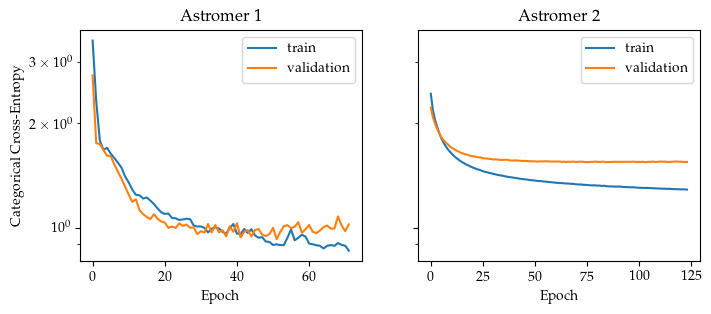

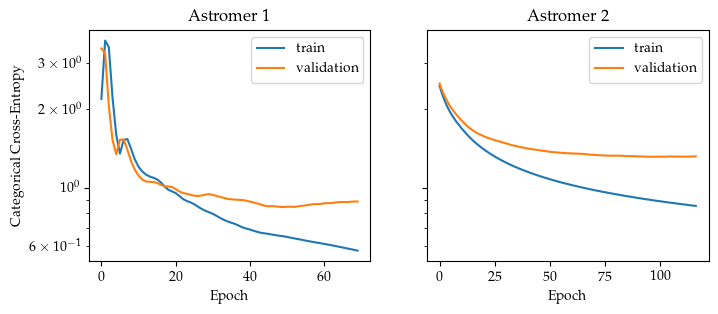

In [32]:
for subset in ['alcock', 'atlas']: 
    
    fig, axes = plt.subplots(1, 2, figsize=(8, 3), sharey=True)
    
    a1_tr_log = os.path.join(a1_path, subset, 'fold_0', '{}_100'.format(subset), 'att_mlp', 'logs', 'train')
    a1_val_log = os.path.join(a1_path, subset, 'fold_0', '{}_100'.format(subset), 'att_mlp', 'logs', 'validation')

    a2_tr_log = os.path.join(a2_path, subset, 'fold_0', '{}_100'.format(subset), 'att_linear', 'logs', 'train')        
    a2_val_log = os.path.join(a2_path, subset, 'fold_0', '{}_100'.format(subset), 'att_linear', 'logs', 'validation')
    
    
    a1_tr  = get_metrics(a1_tr_log, metric_name='epoch_loss', show_keys=False)
    a1_val = get_metrics(a1_val_log, metric_name='epoch_loss', show_keys=False)

    a2_tr  = get_metrics(a2_tr_log, metric_name='epoch_loss', show_keys=False)
    a2_val = get_metrics(a2_val_log, metric_name='epoch_loss', show_keys=False)

    axes[0].plot(a1_tr['step'].values, a1_tr['value'], label='train')
    axes[0].plot(a1_val['step'].values, a1_val['value'], label='validation')
    axes[0].set_title('Astromer 1')
    axes[0].set_yscale('log')
    axes[0].set_ylabel('Categorical Cross-Entropy')
    
    axes[1].plot(a2_tr['step'].values, a2_tr['value'], label='train')
    axes[1].plot(a2_val['step'].values, a2_val['value'], label='validation')
    axes[1].set_title('Astromer 2')
    axes[1].set_yscale('log')
    
    axes[0].set_xlabel('Epoch')
    axes[1].set_xlabel('Epoch')
    
    axes[0].legend()
    axes[1].legend()
    
    